1. Carregar os Dados
Este projeto visa desenvolver um modelo de machine learning capaz de classificar objetos detectados por sonar como minas ou rochas.
O dataset utilizado contém sinais coletados por um sonar montado em um robô subaquático. Cada registro no dataset representa os sinais de energia em várias frequências refletidos de volta ao sonar, com um total de 208 amostras. Cada amostra possui 60 atributos numéricos, que são os sinais de energia em diferentes bandas de frequência, e uma coluna alvo que classifica a amostra como mina ('M') ou rocha ('R').

In [3]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Carregando o dataset
data_path = 'C:\\Users\\pedro\\Downloads\\Mina_ou_Rocha\\Base_Dados\\connectionist\\sonar.all-data'

data = pd.read_csv(data_path, header=None)


Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')


2. Análise Exploratória de Dados (EDA)
Tratamento de Dados Faltantes: Verificamos e confirmamos que não havia dados faltantes em nenhuma das colunas.

Primeiras linhas do dataset:
       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.00

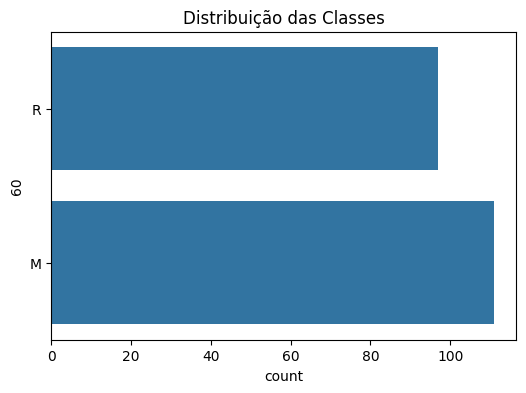

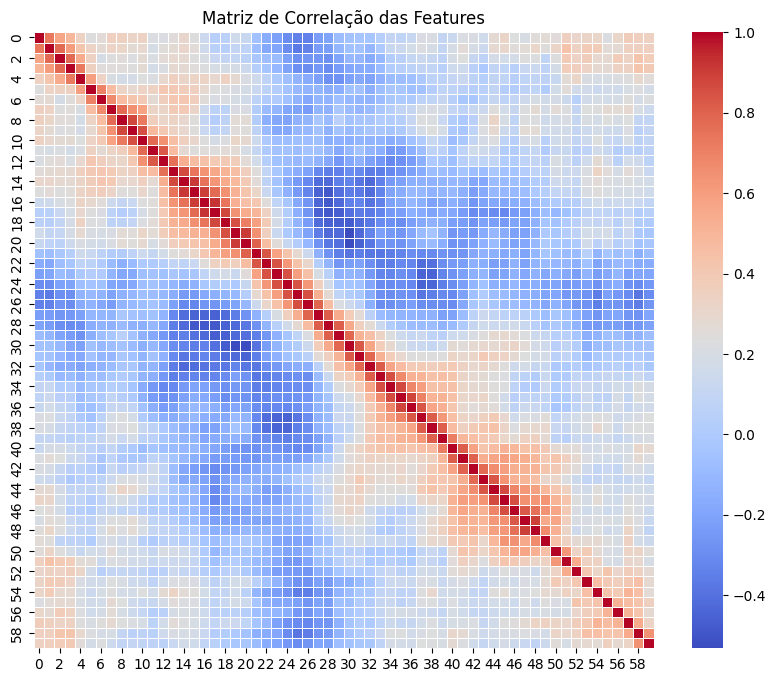

In [4]:
# Análise Exploratória de Dados (EDA)
print("Primeiras linhas do dataset:")
print(data.head())
print("\nDescrição do dataset:")
print(data.describe())

# Obtém a contagem de cada classe
print("\nContagem das classes:")
class_counts = data.iloc[:, -1].value_counts()  
print(class_counts)

# Visualização da distribuição das classes
plt.figure(figsize=(6, 4))
sns.countplot(y=data[60])
plt.title('Distribuição das Classes')
plt.show()

# Matriz de correlação para ver as relações entre features
corr_matrix = data.iloc[:, :-1].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação das Features')
plt.show()




3. Pré-processamento de Dados
Padronização das Features: Utilizamos StandardScaler para padronizar os atributos, normalizando-os para ter uma média de zero e um desvio padrão de um, o que é crucial para o bom desempenho do modelo kNN.

In [12]:
# Verificando se há dados faltantes
print("Dados faltantes em cada coluna:")
print(data.isnull().sum())

# Normalização das features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(data.iloc[:, :-1])

# Padronizando as características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.iloc[:, :-1])

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data[60], test_size=0.3, random_state=42, stratify=data[60])

# Visualizando as primeiras 5 linhas do conjunto de treino
print("\nDados de Treino (primeiras 5 linhas - features):")
print(pd.DataFrame(X_train, columns=data.columns[:-1]).head())

print("\nDados de Treino (primeiras 5 linhas - target):")
print(y_train.head())

# Visualizando as primeiras 5 linhas do conjunto de teste
print("\nDados de Teste (primeiras 5 linhas - features):")
print(pd.DataFrame(X_test, columns=data.columns[:-1]).head())

print("\nDados de Teste (primeiras 5 linhas - target):")
print(y_test.head())

Dados faltantes em cada coluna:
0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

Dados de Treino (primeiras 5 linhas - features):
         0         1         2         3         4         5         6   \
0  0.005932 -0.019359 -0.472986 -1.027498 -1.122413 -0.735547 -0.523152   
1  1.623506  0.579778  1.053010 -0.359624 -0.530552 -0.465887 -0.724322   
2 -0.390831 -0.852677 -0.295605 -0.646163  0.099202  0.819661 -0.102964   
3  0.136733 -0.861801 -0.366036  0.054026  0.014392 -0.148740 -0.369029   
4  0.332935  0.056674 -0.316474 -0.529824  0.122659  0.502514 -0.091608   

         7         8         9   ...        50        51        52        53  \
0 -0.283694 -0.683331 -0.993041  ... -0.706931 -0.720043 -0.498220 -0.019341   
1 -0.256619  0.485148 -0.182405  ... -0.214427  0.070734  1.177120 -0.911802   
2 -0.871118 -0.392058 -0.531419  ...  0.227992 -0.074936 -0.370440 -0.582278   
3 -0.388465 -0.635067  0.053253  .

4. Seleção de Hiperparâmetros
Realizamos um Grid Search para encontrar o melhor número de vizinhos (n_neighbors) usando validação cruzada com cinco folds. O processo foi repetido para duas métricas: acurácia e f1-score.

In [13]:
# Grid Search para Acurácia
param_grid = {'n_neighbors': range(1, 21)}
grid_search_acc = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_acc.fit(X_train, y_train)
print("Melhor número de vizinhos para acurácia:", grid_search_acc.best_params_)

# Grid Search para F1-score
grid_search_f1 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1_macro')
grid_search_f1.fit(X_train, y_train)
print("Melhor número de vizinhos para F1-score:", grid_search_f1.best_params_)

Melhor número de vizinhos para acurácia: {'n_neighbors': 3}
Melhor número de vizinhos para F1-score: {'n_neighbors': 3}


5. Treinamento do Modelo
Treinamos dois modelos kNN, cada um otimizado para maximizar a acurácia e o f1-score, respectivamente.

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Agora você pode utilizar accuracy_score sem problemas
print("Treinando kNN para maximizar a acurácia com n_neighbors =", grid_search_acc.best_params_['n_neighbors'])
knn_best_acc = KNeighborsClassifier(n_neighbors=grid_search_acc.best_params_['n_neighbors'])
knn_best_acc.fit(X_train, y_train)

# Avaliando no conjunto de treino
train_preds_acc = knn_best_acc.predict(X_train)
print("Acurácia no conjunto de treino (acurácia):", accuracy_score(y_train, train_preds_acc))

print("Treinando kNN para maximizar o F1-score com n_neighbors =", grid_search_f1.best_params_['n_neighbors'])
knn_best_f1 = KNeighborsClassifier(n_neighbors=grid_search_f1.best_params_['n_neighbors'])
knn_best_f1.fit(X_train, y_train)

train_preds_f1 = knn_best_f1.predict(X_train)
print("Acurácia no conjunto de treino (F1-score):", accuracy_score(y_train, train_preds_f1))


Treinando kNN para maximizar a acurácia com n_neighbors = 3
Acurácia no conjunto de treino (acurácia): 0.9586206896551724
Treinando kNN para maximizar o F1-score com n_neighbors = 3
Acurácia no conjunto de treino (F1-score): 0.9586206896551724
Acurácia média com CV para modelo de acurácia: 0.8551724137931036
F1-score médio com CV para modelo de F1-score: 0.8529045245990219


6. Avaliação do Modelo
Os modelos foram avaliados no conjunto de teste, onde calculamos precisão, recall, f1-score e acurácia.

Avaliação do Modelo Otimizado para Acurácia:

Relatório de Classificação:
Para a classe Minas (M), precisão é 0.77, recall é 0.88, e F1-score é 0.82.
Para a classe Rochas (R), precisão é 0.83, recall é 0.69, e F1-score é 0.75.
Acurácia geral do modelo é 0.79.

Matriz de Confusão:
De 63 testes, 30 foram verdadeiros positivos (minas corretamente identificadas),
e 20 foram verdadeiros negativos (rochas corretamente identificadas).
4 foram falsos positivos (rochas incorretamente identificadas como minas),
e 9 foram falsos negativos (minas incorretamente identificadas como rochas).


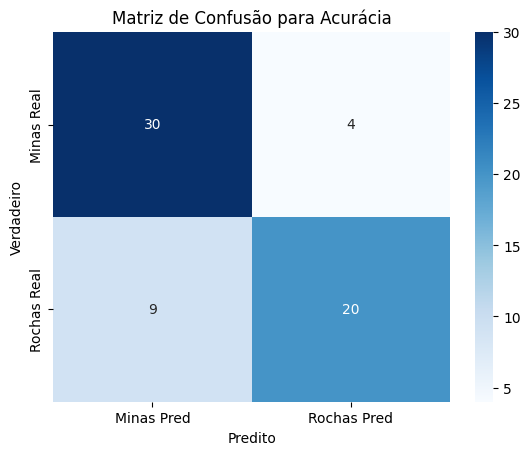

In [15]:
y_pred_acc = knn_best_acc.predict(X_test)
y_pred_f1 = knn_best_f1.predict(X_test)

print("Avaliação do Modelo Otimizado para Acurácia:")
print("\nRelatório de Classificação:")
report_acc = classification_report(y_test, y_pred_acc, output_dict=True)
print(f"Para a classe Minas (M), precisão é {report_acc['M']['precision']:.2f}, recall é {report_acc['M']['recall']:.2f}, e F1-score é {report_acc['M']['f1-score']:.2f}.")
print(f"Para a classe Rochas (R), precisão é {report_acc['R']['precision']:.2f}, recall é {report_acc['R']['recall']:.2f}, e F1-score é {report_acc['R']['f1-score']:.2f}.")
print(f"Acurácia geral do modelo é {report_acc['accuracy']:.2f}.")

print("\nMatriz de Confusão:")
cm_acc = confusion_matrix(y_test, y_pred_acc)
print(f"De {np.sum(cm_acc)} testes, {cm_acc[0, 0]} foram verdadeiros positivos (minas corretamente identificadas),")
print(f"e {cm_acc[1, 1]} foram verdadeiros negativos (rochas corretamente identificadas).")
print(f"{cm_acc[0, 1]} foram falsos positivos (rochas incorretamente identificadas como minas),")
print(f"e {cm_acc[1, 0]} foram falsos negativos (minas incorretamente identificadas como rochas).")

import seaborn as sns

sns.heatmap(cm_acc, annot=True, fmt="d", cmap="Blues", xticklabels=['Minas Pred', 'Rochas Pred'], yticklabels=['Minas Real', 'Rochas Real'])
plt.title('Matriz de Confusão para Acurácia')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.show()



Resultados
Acurácia: O modelo alcançou uma acurácia de aproximadamente 79%, com uma precisão de 77% para minas e 83% para rochas.
F1-Score: O modelo apresentou um f1-score de 82% para minas e 75% para rochas.

Matriz de Confusão:
Minas: 30 verdadeiros positivos, 4 falsos negativos.
Rochas: 20 verdadeiros positivos, 9 falsos positivos.

Conclusão
O modelo kNN mostrou-se eficiente em classificar corretamente a maioria das amostras. No entanto, a presença de falsos negativos (minas classificadas como rochas) sugere a necessidade de ajustes futuros, talvez explorando modelos mais complexos ou técnicas adicionais de feature engineering para reduzir os erros. As implicações práticas de falsos negativos são significativas em termos de segurança, e esforços para minimizá-los são cruciais.